### Read CMDX and Edomex shapefiles 

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Read AGEBs'shapefile
cdmx = "09a.shp"
edomex = "15a.shp"
cdmx_st = "09ent.shp"
edomex_st = "15ent.shp"

map_cdmx = gpd.read_file(cdmx)
map_edomex = gpd.read_file(edomex)
map_cdmx_st = gpd.read_file(cdmx_st)
map_edomex_st = gpd.read_file(edomex_st)

map_cdmx.head()
map_edomex.head()
# map_edomex_st.head()
# map_cdmx_st.head()


,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,1500100010339,15,001,0001,0339,"POLYGON ((2724772.988799997 886433.4648000002,..."
1,1500100010288,15,001,0001,0288,"POLYGON ((2724704.501199997 885107.5006000008,..."
2,1500100010127,15,001,0001,0127,"POLYGON ((2725014.736900003 886056.2619999964,..."
3,1500100010235,15,001,0001,0235,"POLYGON ((2724581.913000002 884617.5819000006,..."
4,1500100010254,15,001,0001,0254,"POLYGON ((2725794.810500004 885710.143699998, ..."


### Adjust the coordinate system

In [2]:
map_cdmx.crs 

# Change to Web Mercator projection
map_cdmx = map_cdmx.to_crs({'init': 'epsg:4326'})
map_edomex = map_edomex.to_crs({'init': 'epsg:4326'})

map_cdmx_st = map_cdmx_st.to_crs({'init': 'epsg:4326'})
map_edomex_st = map_edomex_st.to_crs({'init': 'epsg:4326'})


In [3]:
# Count how many AGEBs
map_cdmx.count()
map_edomex.count()

# Count how many states
map_cdmx_st.count()
map_edomex_st.count()


CVEGEO      1
CVE_ENT     1
NOMGEO      1
geometry    1
dtype: int64

### Plot the maps

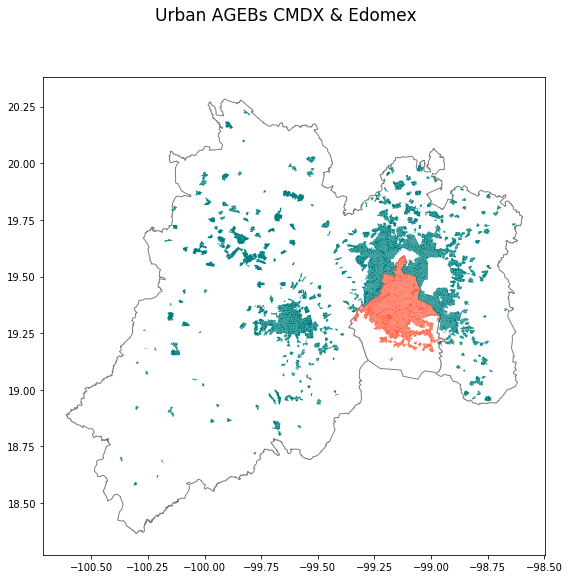

In [4]:
f, ax = plt.subplots(1, figsize=(9, 9))
f.suptitle('Urban AGEBs CMDX & Edomex', fontsize=17)

map_edomex_st.plot(facecolor='white', edgecolor='grey', ax=ax) # Edomex state layer
map_cdmx_st.plot(facecolor='white', edgecolor='grey', ax=ax) # CDMX state layer
map_cdmx.plot(facecolor='tomato',  ax=ax) # Edomex AGEBs layer
map_edomex.plot(facecolor='teal',  ax=ax) # CDMX AGEBs layer

plt.show()

### Generate centroid coordinates for each of both states' AGEBs

In [5]:
## CDMX centroids

map_cdmx["lat"] = map_cdmx.centroid.map(lambda p: p.x)
map_cdmx["lon"] = map_cdmx.centroid.map(lambda p: p.y)

map_cdmx=map_cdmx.drop(['geometry', 'CVEGEO'], axis=1)

map_cdmx['CVE_AGEB'] = map_cdmx['CVE_AGEB'].astype(str)
map_cdmx['CVE_LOC'] = map_cdmx['CVE_LOC'].astype(str)
map_cdmx['CVE_MUN'] = map_cdmx['CVE_MUN'].astype(str)
map_cdmx['CVE_ENT'] = map_cdmx['CVE_ENT'].astype(str)

## Edomex centroids

map_edomex["lat"] = map_edomex.centroid.map(lambda p: p.x)
map_edomex["lon"] = map_edomex.centroid.map(lambda p: p.y)

map_edomex=map_edomex.drop(['geometry', 'CVEGEO'], axis=1)

map_edomex['CVE_AGEB'] = map_edomex['CVE_AGEB'].astype(str)
map_edomex['CVE_LOC'] = map_edomex['CVE_LOC'].astype(str)
map_edomex['CVE_MUN'] = map_edomex['CVE_MUN'].astype(str)
map_edomex['CVE_ENT'] = map_edomex['CVE_ENT'].astype(str)

 
map_cdmx.head()


,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,lat,lon
0,09,002,0001,0148,-99.209991,19.498004
1,09,002,0001,0190,-99.192546,19.494634
2,09,002,0001,0932,-99.183687,19.506164
3,09,002,0001,0237,-99.211804,19.491335
4,09,002,0001,0595,-99.216435,19.482261


### Append both states' dataframes and export to csv

In [14]:
map_2states=map_cdmx.append(map_edomex)
map_2states
map_2states.to_csv('coordenadas (1).csv')